In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('loan_prediction.csv')

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [7]:
df.drop('Loan_ID',axis=1,inplace=True)

#### Understanding the Features of the dataset

In [8]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

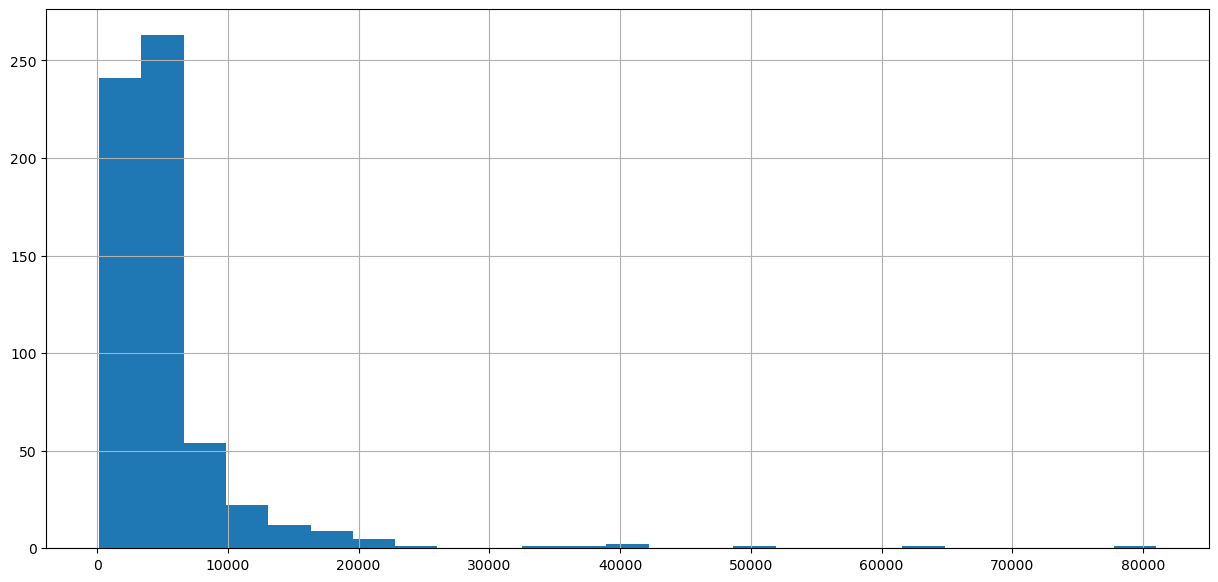

In [9]:
plt.figure(figsize=(15,7))
df['ApplicantIncome'].hist(bins=25)
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

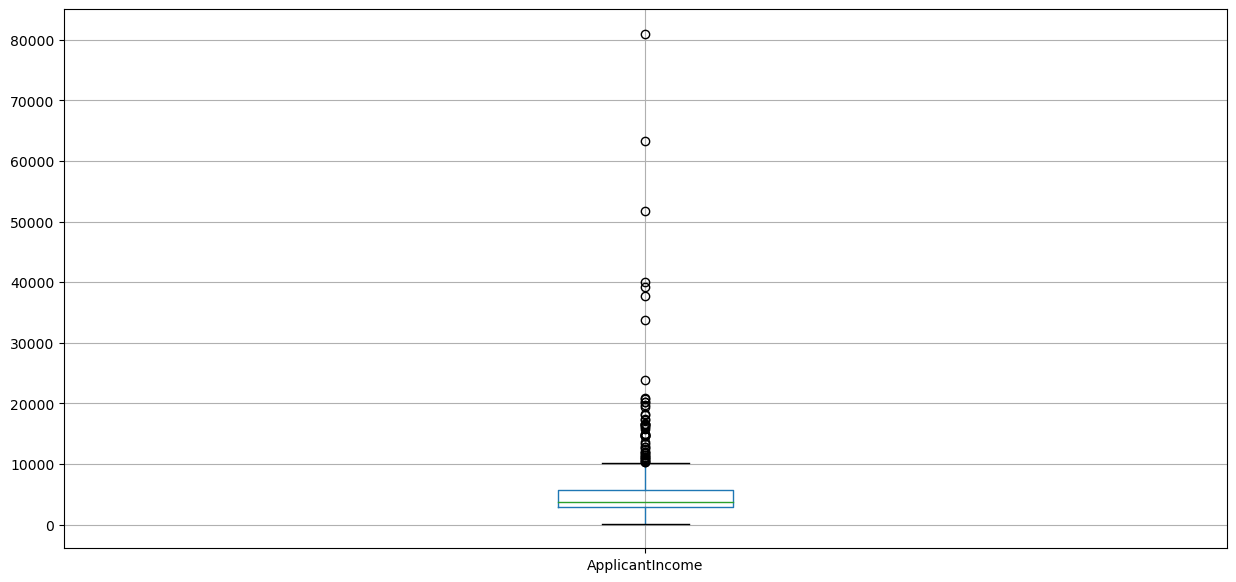

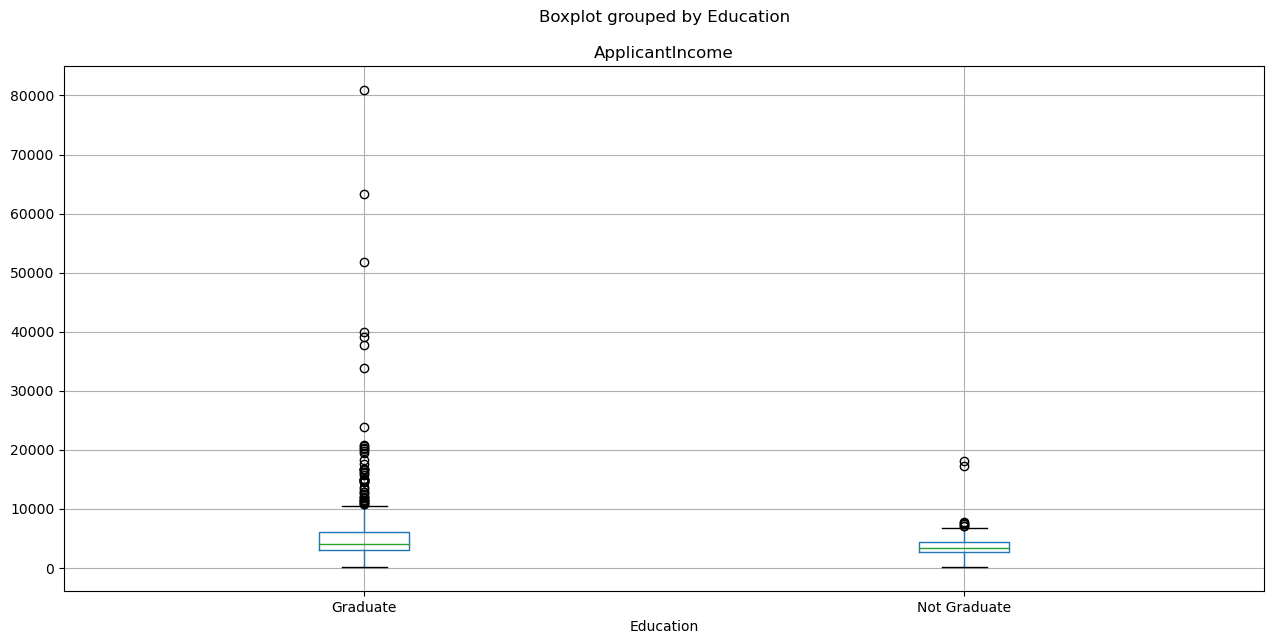

In [10]:
df.boxplot(column='ApplicantIncome',figsize=(15,7))
df.boxplot(column='ApplicantIncome', by = 'Education',figsize=(15,7))

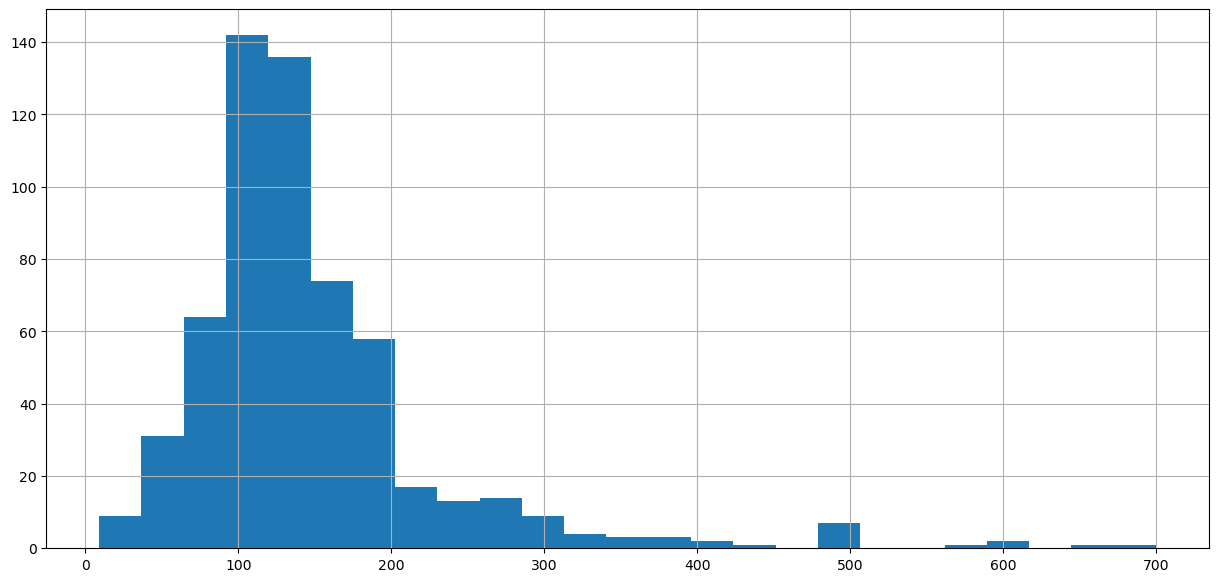

In [11]:
plt.figure(figsize=(15,7))
df['LoanAmount'].hist(bins=25)
plt.show()

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

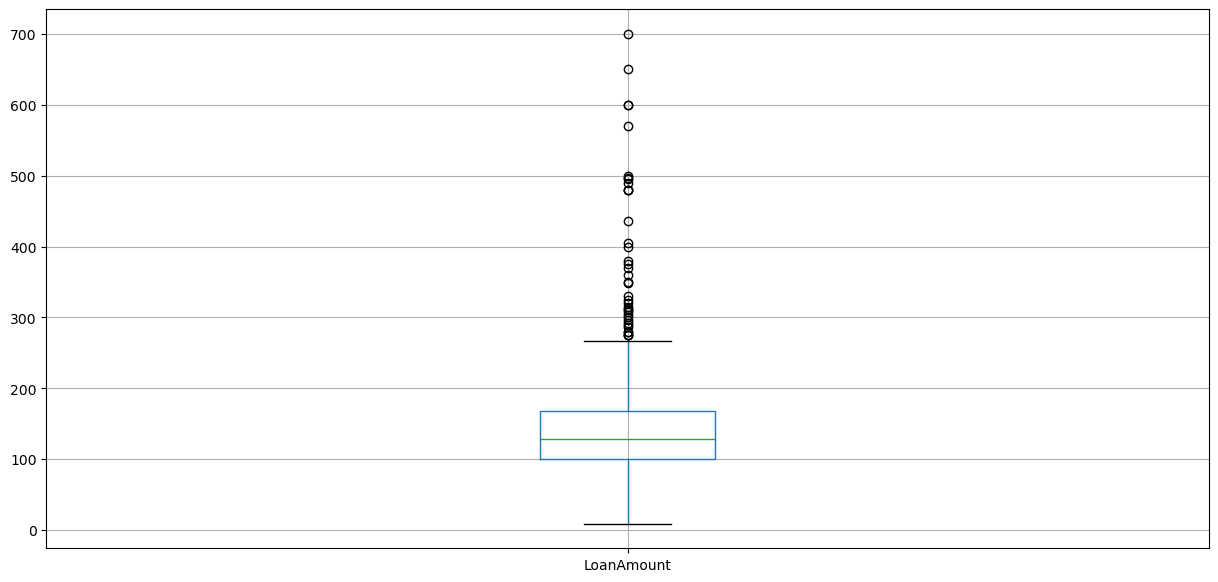

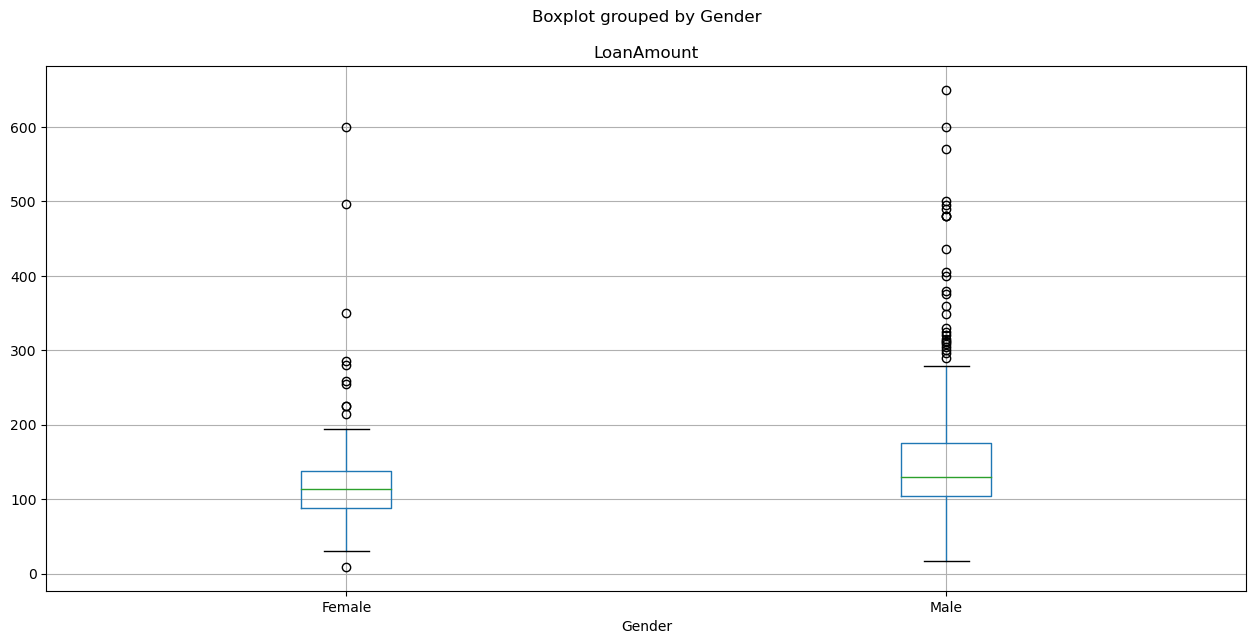

In [12]:
df.boxplot(column='LoanAmount',figsize=(15,7))
df.boxplot(column='LoanAmount', by = 'Gender',figsize=(15,7))

In [13]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

#### Analysis of Categorical Values

In [14]:
df['Loan_Status'].value_counts()['Y']


422

In [15]:
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [16]:
def percentageConvert(ser):
    return ser/float(ser[-1])


In [17]:
tabs = pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
tabs

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [18]:
app_loan = tabs['Y'][1]
print(f'{app_loan*100:.2f} % applicants got their loans approved')

79.58 % applicants got their loans approved


#### So this is a good data set to train with 

In [19]:
df['Self_Employed'].fillna('No',inplace=True)

In [20]:
#df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
#df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [21]:
#plt.figure(figsize=(15,7))
#df['TotalIncome'].hist(bins=25)
#plt.show()

In [22]:
#plt.figure(figsize=(15,7))
#df['TotalIncome_log'].hist(bins=25)
#plt.show()

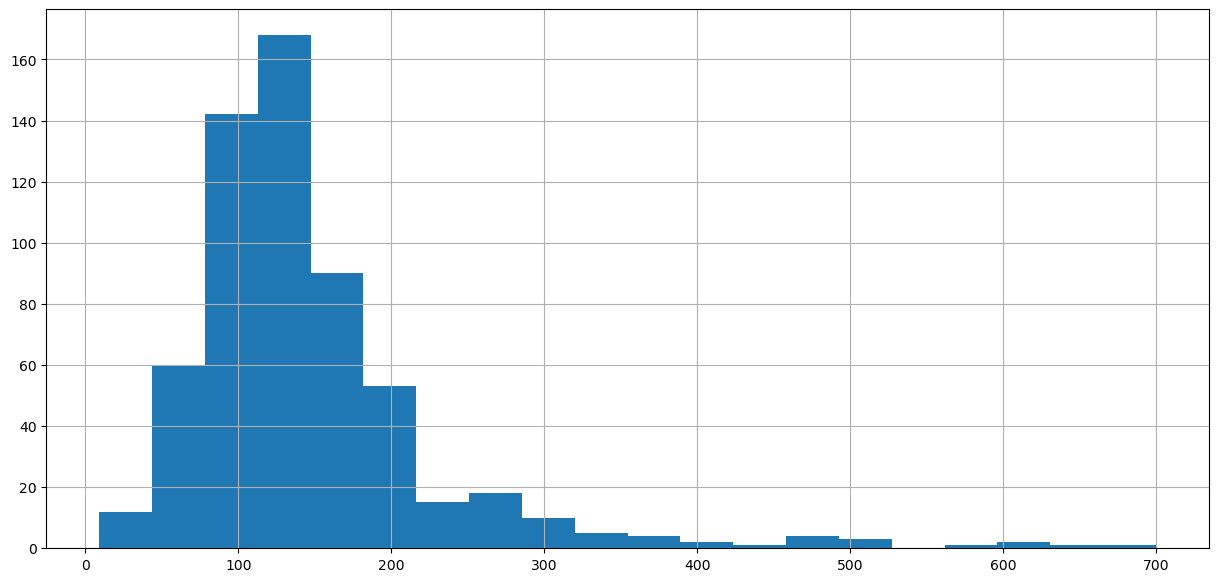

In [23]:
plt.figure(figsize=(15,7))
df['LoanAmount'].hist(bins=20)
plt.show()

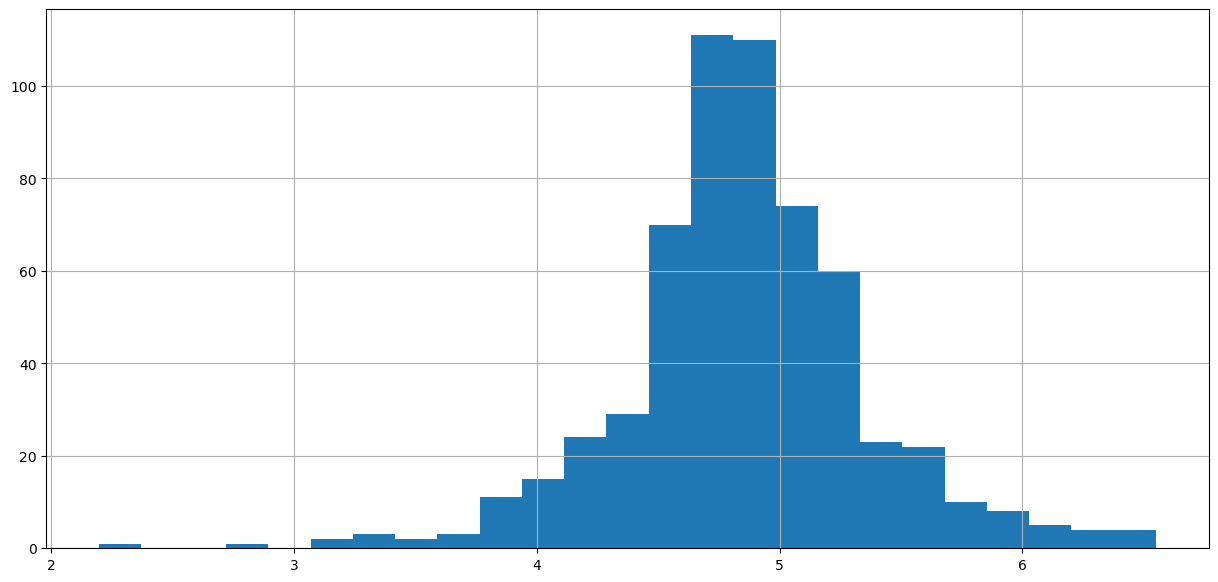

In [24]:
df['LoanAmount'] = np.log(df['LoanAmount'])
plt.figure(figsize=(15,7))
df['LoanAmount'].hist(bins=25)
plt.show()

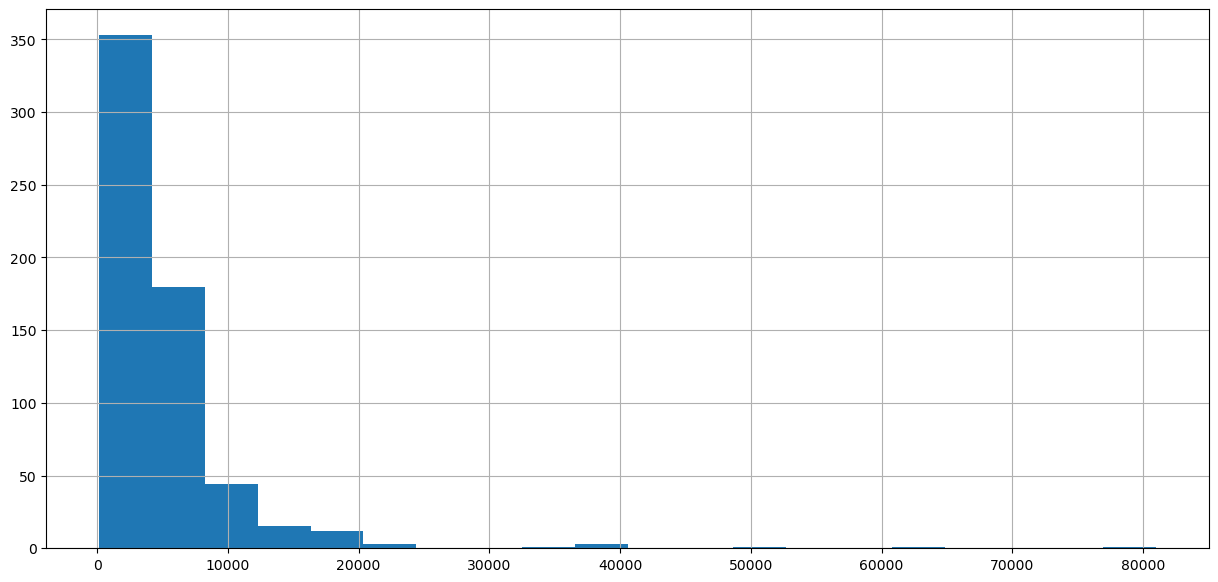

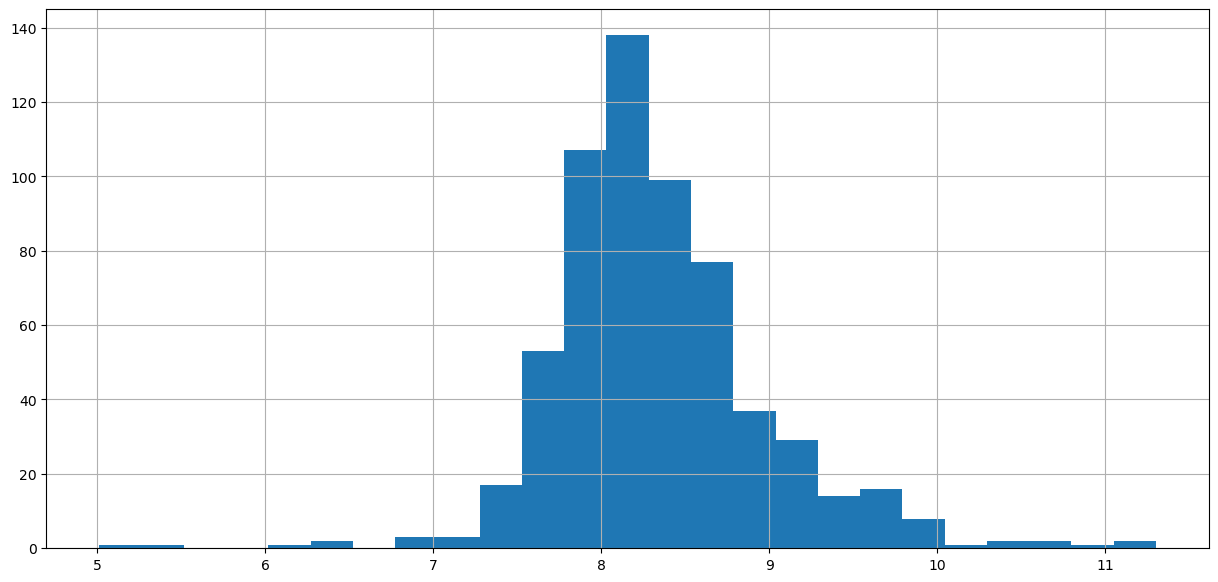

In [25]:
plt.figure(figsize=(15,7))
df['ApplicantIncome'].hist(bins=20)
plt.show()
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
plt.figure(figsize=(15,7))
df['ApplicantIncome'].hist(bins=25)
plt.show()

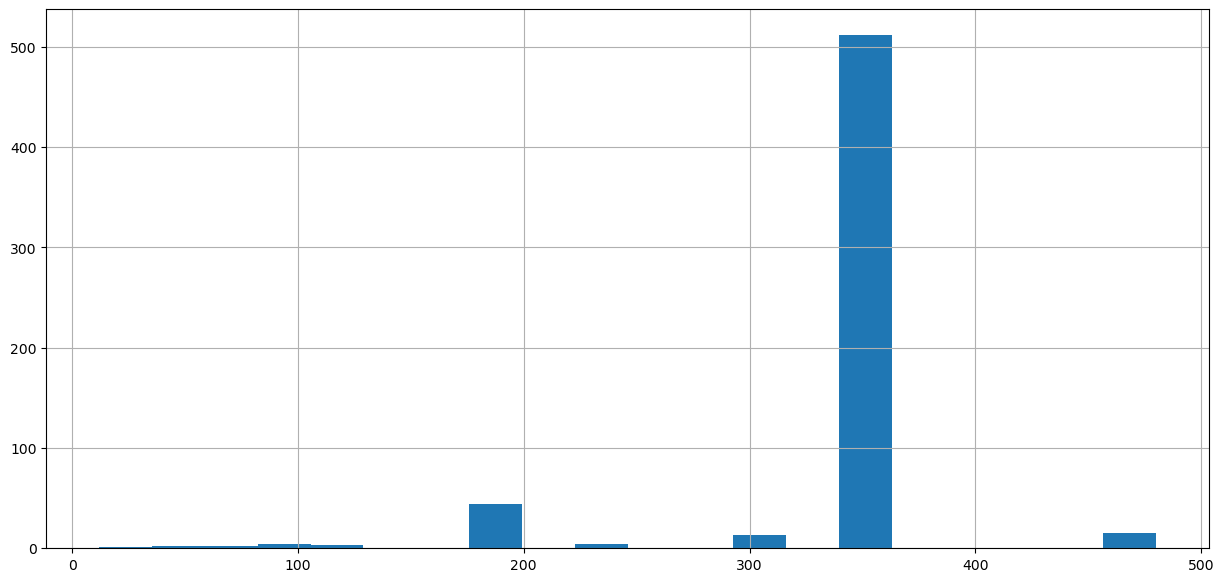

In [26]:
plt.figure(figsize=(15,7))
df['Loan_Amount_Term'].hist(bins=20)
plt.show()
#df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
#plt.figure(figsize=(15,7))
#df['ApplicantIncome'].hist(bins=25)
#plt.show()

In [27]:
#df.drop('LoanAmount',axis=1,inplace=True)

In [28]:
#df.drop('TotalIncome',axis=1,inplace=True)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,Y


####  Now to Handle with null values

In [30]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)


In [31]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace=True)

In [32]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [33]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.0,4.857444,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.0,4.948760,360.0,1.0,Urban,Y


In [35]:
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
target = ['Loan_Status']
all_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status', 'TotalIncome_log',
       'LoanAmount_log']

In [36]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
for var in cat:
    le = LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))

print('Done encoding Catergorical Values')
for tar in target:
    oe = OneHotEncoder()
    df[tar]=le.fit_transform(df[tar].astype('str'))
print('Done encoding Target Value')

Done encoding Catergorical Values
Done encoding Target Value


In [37]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.0,4.857444,360.0,1,2,1
1,1,1,1,0,0,8.430109,1508.0,4.852030,360.0,1,0,0
2,1,1,0,0,1,8.006368,0.0,4.189655,360.0,1,2,1
3,1,1,0,1,0,7.856707,2358.0,4.787492,360.0,1,2,1
4,1,0,0,0,0,8.699515,0.0,4.948760,360.0,1,2,1


In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [39]:
test.to_csv('test.csv',encoding='utf-8',index=False)
train.to_csv('train.csv',encoding='utf-8',index=False)